<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

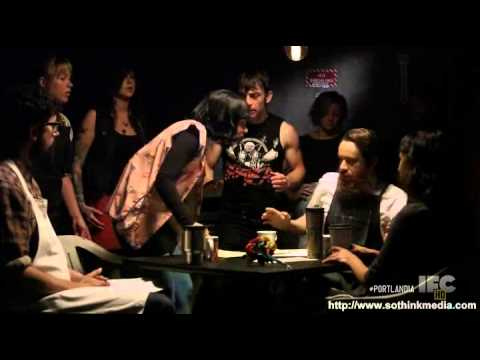

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/home/jay/Desktop/school_projects/lambda_repos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# start investigating data
shops.describe()

,coffee_shop_name,full_review_text,star_rating
count,7616,7616,7616
unique,79,6915,5
top,Epoch Coffee,10/16/2016 Amazing coffee! Waffle banana and ...,5.0 star rating
freq,400,4,3780


In [6]:
# list the coffee shops
shops['coffee_shop_name'].unique()

array(['The Factory - Cafe With a Soul ',
       'The Marvelous Vintage Tea Party Co. ', 'Vintage Heart Coffee ',
       'Fleet Coffee ', 'Mozart’s Coffee Roasters ',
       'Summermoon Coffee Bar ', 'Monkey Nest Coffee ',
       'Apanas Coffee & Beer ', 'Corona Coffee ', 'Café Crème ',
       'Brian’s Brew ', 'Legend Coffee ', 'Venezia Italian Gelato ',
       'Epoch Coffee ', 'Houndstooth Coffee ', 'Caffé Medici ',
       'Flitch Coffee ', 'Caffe Medici ', 'Holy Grounds ',
       'Figure 8 Coffee Purveyors ', 'Mañana Coffee & Juice ',
       'Summer Moon Coffee Bar ', 'Fat Cats Organic Coffee And Dessert ',
       'Flat Track Coffee ', 'Mary’s Cafe ', 'Anderson’s Coffee Company ',
       'Flightpath Coffeehouse ', 'Third Coast Coffee Roasting Company ',
       'Bennu Coffee ', 'Dolce Neve ', 'Thunderbird Coffee ', 'Halcyon ',
       'Cherrywood Coffeehouse ', 'Jo’s Coffee ',
       'Arturo’s Underground Cafe ', 'Patika ', 'Cenote ',
       'The Hideout Coffeehouse ', 'Lucky Lab Coffe

In [7]:
# Clean up ratings column and convert them to floats
shops['star_rating'] = shops['star_rating'].str.replace('star rating', "").astype('float')

In [8]:
# look at longest review to get picture of what content is in the text
# the date is extra as well as 'updated review'
shops['full_review_text'].max()

' 9/9/2016 Updated review Still my favorite coffee shop!  Figure 8 is a bright spot in a sea of "cooler than you" coffee shops that seem to be popping up everywhere.  If you\'re not drinking coffee here, you\'re missing out. '

In [9]:
# Not sure if this needs to be imported
import re

# Remove dates. 2 lines bec some dates are single digit day (Dec 4)
shops['full_review_text'] = shops['full_review_text'].str.replace('../../....', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('.././....', '')

In [10]:
# Remove 'X check-in(s)' and strip extra whitespace
# THIS DID NOT WORK AS EXPECTED - COME BACK TO LATER
shops['full_review_text'] = shops['full_review_text'].str.replace('. check-in. ', "").str.strip().str.lower()

In [11]:
# Subset just genuine joe coffee shop
genuine_joe = shops[shops['coffee_shop_name'] == 'Genuine Joe ']

print(genuine_joe.shape)

genuine_joe.head()

(100, 3)


,coffee_shop_name,full_review_text,star_rating
5241,Genuine Joe,seriously the best iced chai in austin. i am ...,5.0
5242,Genuine Joe,room nice. plain coffee meh. they have intri...,4.0
5243,Genuine Joe,1 check-in the artist group i belong to had a ...,4.0
5244,Genuine Joe,1 check-in i came here because it was the high...,4.0
5245,Genuine Joe,hands down my favorite coffee shop in austin. ...,5.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Most of the ratings are 4/5 star - thats a good sign
sns.countplot(genuine_joe['star_rating']);

In [13]:
# 75% of ratings are 4 and 5 star
genuine_joe['star_rating'].value_counts(normalize=True).head()

5.0    0.40
4.0    0.35
3.0    0.11
2.0    0.08
1.0    0.06
Name: star_rating, dtype: float64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [15]:
# first check the length
len(nlp.Defaults.stop_words)

326

In [16]:
# add spaces to stop words
nlp.Defaults.stop_words |= {" ", "  ", "", "   ", '1', 'austin', 'coffee', 'place', 'shop', 'joe', 'genuine',
                            'chai', 'drink', 'tea', 'latte', 'get', 'come', 'go', '10', '4'}

In [17]:
# check that the length is 2 longer
len(nlp.Defaults.stop_words)

344

In [18]:
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

12

In [19]:
# create a column with spacy tokens of the text

tokens = []

for doc in nlp.pipe(genuine_joe['full_review_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens[1:])

genuine_joe['tokens'] = tokens

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
genuine_joe.head()

,coffee_shop_name,full_review_text,star_rating,tokens
5241,Genuine Joe,seriously the best iced chai in austin. i am ...,5.0,"[the, best, iced, chai, in, austin, ., , i, a..."
5242,Genuine Joe,room nice. plain coffee meh. they have intri...,4.0,"[nice, ., , plain, coffee, meh, ., , they, h..."
5243,Genuine Joe,1 check-in the artist group i belong to had a ...,4.0,"[check, -, in, the, artist, group, i, belong, ..."
5244,Genuine Joe,1 check-in i came here because it was the high...,4.0,"[check, -, in, i, came, here, because, it, was..."
5245,Genuine Joe,hands down my favorite coffee shop in austin. ...,5.0,"[down, my, favorite, coffee, shop, in, austin,..."


In [21]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [22]:
# get count of all the words
count(genuine_joe['tokens'])

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
65,.,98,614,1.0,0.053447,0.053447,0.98
13,the,93,443,2.0,0.038562,0.092009,0.93
70,",",80,401,3.0,0.034906,0.126915,0.80
16,and,92,333,4.0,0.028987,0.155902,0.92
54,i,77,297,5.0,0.025853,0.181755,0.77
10,a,83,285,6.0,0.024808,0.206563,0.83
32,to,71,224,7.0,0.019499,0.226062,0.71
52,,54,218,8.0,0.018976,0.245038,0.54
8,it,65,168,9.0,0.014624,0.259662,0.65
58,is,65,167,10.0,0.014537,0.274199,0.65


In [23]:
# func for getting lemmas
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas[1:]

In [24]:
# create column of lemmas
genuine_joe['lemmas'] = genuine_joe['full_review_text'].apply(get_lemmas)

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
genuine_joe.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
5241,Genuine Joe,seriously the best iced chai in austin. i am ...,5.0,"[the, best, iced, chai, in, austin, ., , i, a...","[good, ice, fan, tired, regular, old, iced, cl..."
5242,Genuine Joe,room nice. plain coffee meh. they have intri...,4.0,"[nice, ., , plain, coffee, meh, ., , they, h...","[nice, plain, meh, intriguing, mocha, headline..."
5243,Genuine Joe,1 check-in the artist group i belong to had a ...,4.0,"[check, -, in, the, artist, group, i, belong, ...","[artist, group, belong, planning, meeting, eas..."
5244,Genuine Joe,1 check-in i came here because it was the high...,4.0,"[check, -, in, i, came, here, because, it, was...","[come, high, rate, near, time, happy, bit, par..."
5245,Genuine Joe,hands down my favorite coffee shop in austin. ...,5.0,"[down, my, favorite, coffee, shop, in, austin,...","[favorite, vibe, perfect, varied, seating, nic..."


In [26]:
# Get the word count df for the lemmas, and iterate to remove unhelpful words
count(genuine_joe['lemmas']).head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,good,45,61,1.0,0.016554,0.016554,0.45
61,like,35,51,2.0,0.013840,0.030393,0.35
76,work,35,49,3.0,0.013297,0.043691,0.35
101,room,26,44,4.0,0.011940,0.055631,0.26
2,great,31,34,5.0,0.009227,0.064858,0.31
24,people,23,27,6.0,0.007327,0.072185,0.23
33,nice,22,27,7.0,0.007327,0.079512,0.22
114,time,23,26,8.0,0.007056,0.086567,0.23
75,get,20,25,9.0,0.006784,0.093351,0.20
197,friendly,23,24,10.0,0.006513,0.099864,0.23


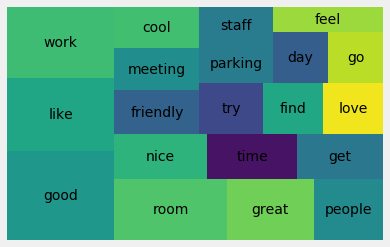

In [27]:
# Plot the word cloud for the top 20 most common words

import squarify

plt.style.use('fivethirtyeight')
wc = count(genuine_joe['lemmas'])
top_20 = wc[wc['rank'] <= 20]

squarify.plot(top_20['pct_total'], label=top_20['word'])
plt.axis('off')
plt.show()

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


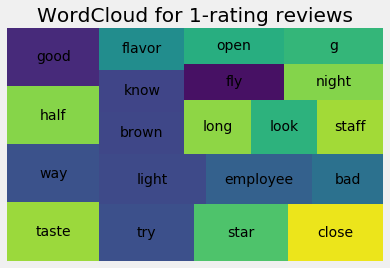

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


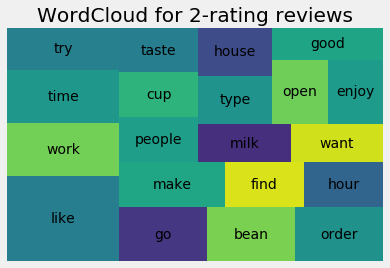

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


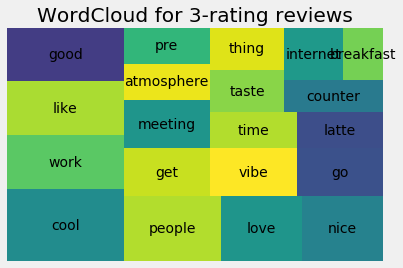

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


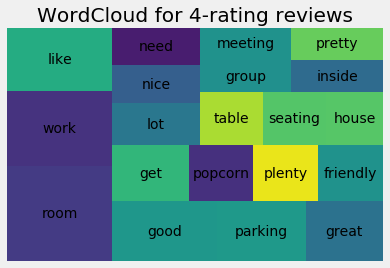

/home/jay/anaconda3/envs/nlp-u4-s1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


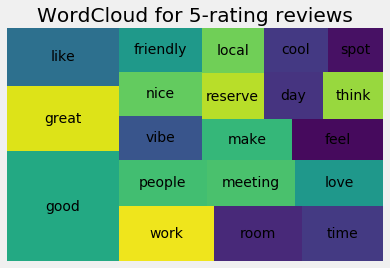

In [28]:
# Heres a loop to get the word clouds of all the ratings individually

for n in range(1, 6):
    subset = genuine_joe[genuine_joe['star_rating'] == n]
    subset['lemmas'] = subset['full_review_text'].apply(get_lemmas)
    
    wc = count(subset['lemmas'])
    top_20 = wc[wc['rank'] <= 20]
    
    squarify.plot(top_20['pct_total'], label=top_20['word'])
    plt.axis('off')
    plt.title(f'WordCloud for {n}-rating reviews')
    plt.show()

In [29]:
# Split reviews into groups of good and bad 
bad_reviews = genuine_joe[genuine_joe['star_rating'] <= 3.0]
good_reviews = genuine_joe[genuine_joe['star_rating'] > 3.0]

bad_wc = count(bad_reviews['lemmas'])
good_wc = count(good_reviews['lemmas'])

In [30]:
# confirm bad_reviews is the right df
bad_reviews['star_rating'].value_counts()

3.0    11
2.0     8
1.0     6
Name: star_rating, dtype: int64

In [31]:
good_reviews['star_rating'].value_counts()

5.0    40
4.0    35
Name: star_rating, dtype: int64

In [32]:
bad_wc.sort_values('rank').head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
26,like,12,15,1.0,0.016181,0.016181,0.48
25,work,7,12,2.0,0.012945,0.029126,0.28
23,good,9,12,3.0,0.012945,0.042071,0.36
58,people,9,11,4.0,0.011866,0.053937,0.36
64,go,7,10,5.0,0.010787,0.064725,0.28
30,time,7,9,6.0,0.009709,0.074434,0.28
101,taste,5,9,7.0,0.009709,0.084142,0.20
57,try,6,8,8.0,0.008630,0.092772,0.24
32,nice,6,8,9.0,0.008630,0.101402,0.24
197,cool,4,8,10.0,0.008630,0.110032,0.16


In [33]:
good_wc.sort_values('rank').head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,good,36,49,1.0,0.017766,0.017766,0.480000
101,room,24,42,2.0,0.015228,0.032995,0.320000
76,work,28,37,3.0,0.013416,0.046410,0.373333
61,like,23,36,4.0,0.013053,0.059463,0.306667
2,great,29,32,5.0,0.011603,0.071066,0.386667
197,friendly,19,20,6.0,0.007252,0.078318,0.253333
33,nice,16,19,7.0,0.006889,0.085207,0.213333
75,get,15,19,8.0,0.006889,0.092096,0.200000
85,meeting,13,19,9.0,0.006889,0.098985,0.173333
94,parking,16,17,10.0,0.006164,0.105149,0.213333


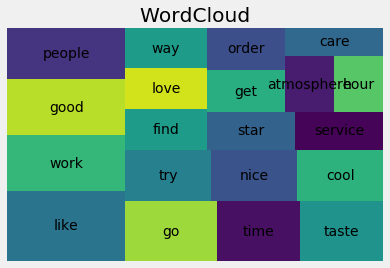

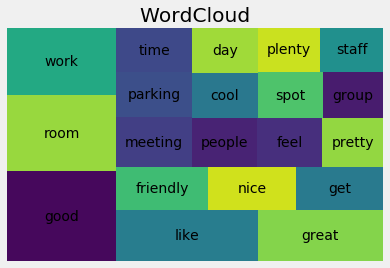

In [34]:
for i in [bad_wc, good_wc]:
    top_20 = i[i['rank'] <= 20]
    squarify.plot(top_20['pct_total'], label=top_20['word'])
    plt.title(f'WordCloud')
    plt.axis('off')
    plt.show()

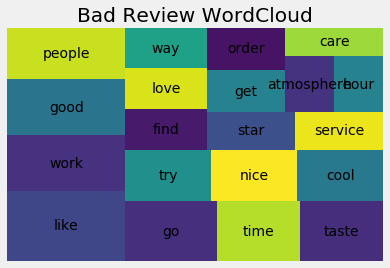

In [35]:
top_20 = bad_wc[bad_wc['rank'] <= 20]
squarify.plot(top_20['pct_total'], label=top_20['word'])
plt.title('Bad Review WordCloud')
plt.axis('off')
plt.show()

In [36]:
top_20.iloc[4]['word']

'go'

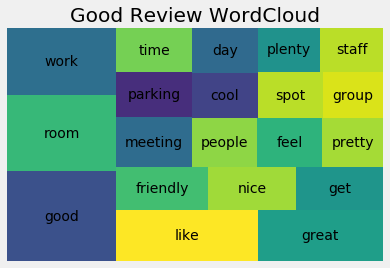

In [37]:
top_20 = good_wc[good_wc['rank'] <= 20]
squarify.plot(top_20['pct_total'], label=top_20['word'])
plt.title('Good Review WordCloud')
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

